In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn. tree import DecisionTreeRegressor
from sklearn. ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
snc_df = pd.read_csv('C:/Users/rajes/Downloads/archive/school_and_country_table.csv')
times = pd.read_csv('C:from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')/Users/rajes/Downloads/archive/timesData.csv')
cwur = pd.read_csv('C:/Users/rajes/Downloads/archive/cwurData.csv')
shan = pd.read_csv('C:/Users/rajes/Downloads/archive/shanghaiData.csv')

In [4]:
snc_df.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [5]:
times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [6]:
shan.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [7]:
cwur = pd.read_csv('C:/Users/rajes/Downloads/archive/cwurData.csv')
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [8]:
cwur.shape
cwur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [9]:
np.sum(cwur.isnull())

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [10]:
DataTypeSeries = cwur.dtypes
print('Data type of each column of times data Dataframe:')
print(DataTypeSeries)

Data type of each column of times data Dataframe:
world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object


In [11]:
cwur.describe(include='all')

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200,2200,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
unique,NaN,1024,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Harvard University,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,459.590909,NaN,NaN,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,NaN,NaN,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,NaN,NaN,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,NaN,NaN,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,NaN,NaN,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000


<Axes: ylabel='count'>

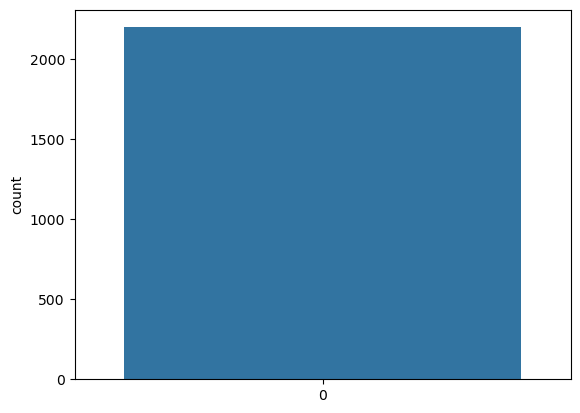

In [12]:
sns.countplot(cwur.year)

<function matplotlib.pyplot.show(close=None, block=None)>

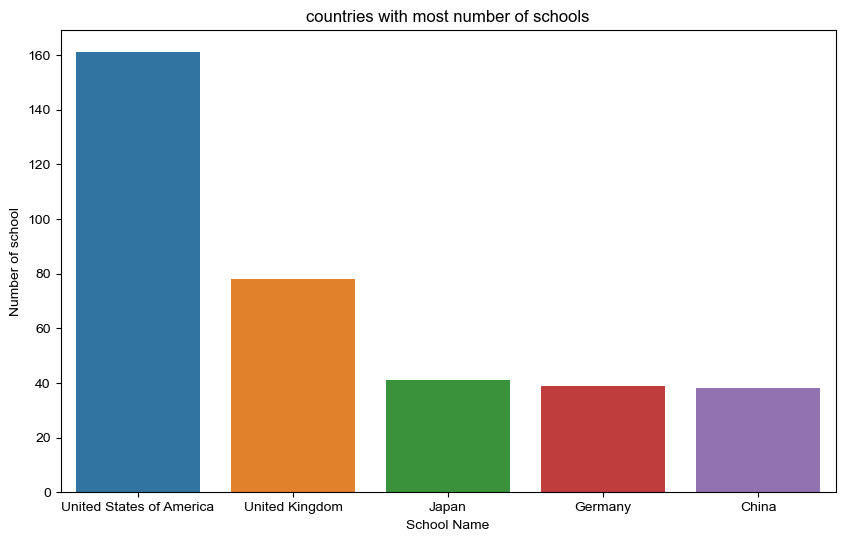

In [13]:
mostschools = snc_df.groupby('country').school_name.count().sort_values(ascending=False).head() 
ypoints =np.array (mostschools)
xpoints =np.array (mostschools.index)
plt.figure(figsize=(10, 6))
sns.barplot(x=xpoints, y=ypoints)
sns.set_style("darkgrid")
plt.xlabel ("School Name")
plt.ylabel ("Number of school")
plt.title("countries with most number of schools")
plt.show

In [14]:
Top10 = cwur.head(10)

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

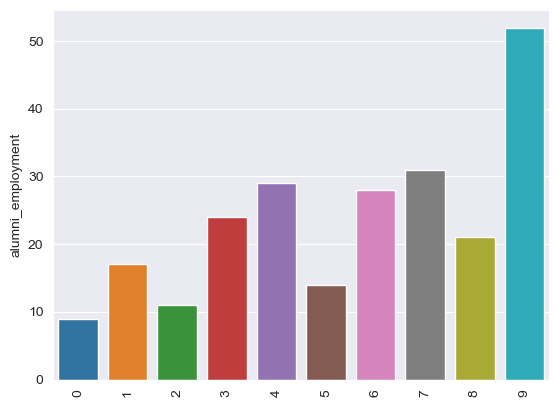

In [15]:
sns.barplot(x=Top10.index,y="alumni_employment",data=Top10).set_xticklabels(labels=Top10.index,rotation=90)

<function matplotlib.pyplot.show(close=None, block=None)>

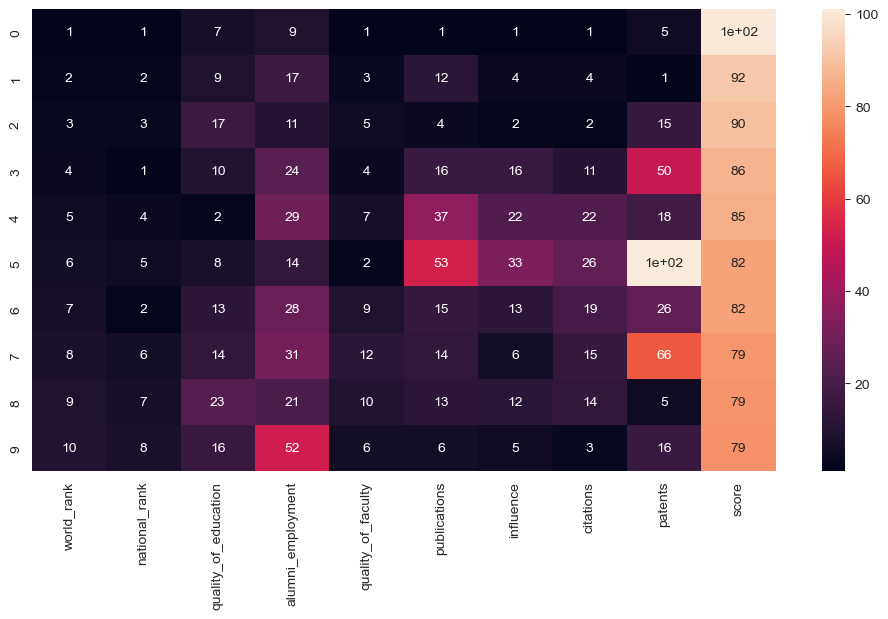

In [16]:
topi= cwur.head(10)

#topi.info()


topi_f = topi.loc[:,['world_rank','national_rank','quality_of_education','alumni_employment','quality_of_faculty','publications',
                    'influence','citations','patents','score']]
plt.figure(figsize=(12,6))
sns.heatmap(data=topi_f,annot=True)
plt.show

In [34]:
X = cwur.iloc[:,: -1]
Y = cwur.iloc[:,-1 :]

In [35]:
X = X.drop(['world_rank','country','national_rank','broad_impact','score','institution'],axis=1)
X.head()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,7,9,1,1,1,1,5
1,9,17,3,12,4,4,1
2,17,11,5,4,2,2,15
3,10,24,4,16,16,11,50
4,2,29,7,37,22,22,18


In [36]:
Y.head()

,year
0,2012
1,2012
2,2012
3,2012
4,2012


In [37]:
Y.shape

(2200, 1)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

In [63]:
Y_pred = rf. predict ([[7,9,1,1,1,1,5]])
print (Y_pred)

[2012.73333333]


In [69]:
linReg = LinearRegression()
linReg.fit(X_train, Y_train)
Y_pred = linReg.predict(X_test)
print ("Prediction Evaluation using Linear Regression" )
print ("MAE: " ,mean_absolute_error(Y_test,Y_pred))
print ("MSE: " ,mean_squared_error(Y_test, Y_pred))
print ("RMSE: " ,np.sqrt(mean_squared_error(Y_test, Y_pred)))
print ("R^2: " ,r2_score(Y_test,Y_pred))

Prediction Evaluation using Linear Regression
MAE:  0.5175768212551775
MSE:  0.37456968798933404
RMSE:  0.6120209865595575
R^2:  0.3396467550449841


In [70]:
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X, Y)
Y_pred = lassoReg.predict(X_test)
print ("Prediction Evaluation using Lasso Regression" )
print ("MAE: " ,mean_absolute_error(Y_test,Y_pred))
print ("MSE: " ,mean_squared_error(Y_test, Y_pred))
print ("RMSE: " ,np.sqrt(mean_squared_error(Y_test, Y_pred)))
print ("R^2: " ,r2_score(Y_test,Y_pred))

Prediction Evaluation using Lasso Regression
MAE:  0.5140167069243241
MSE:  0.371857999413958
RMSE:  0.6098016066016536
R^2:  0.3444273670578495


In [71]:
svr = SVR(). fit (X, Y)
Y_pred = svr.predict(X_test)
print ("Prediction Evaluation using Support Vector Regression" )
print ("MAE: " ,mean_absolute_error(Y_test,Y_pred))
print ("MSE: " ,mean_squared_error(Y_test, Y_pred))
print ("RMSE: " ,np.sqrt(mean_squared_error(Y_test, Y_pred)))
print ("R^2: " ,r2_score(Y_test,Y_pred))

Prediction Evaluation using Support Vector Regression
MAE:  0.38379993088326864
MSE:  0.29003754745906124
RMSE:  0.5385513415256351
R^2:  0.4886739590395278


In [72]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X, Y)
Y_pred = dt.predict(X_test)
print ("Prediction Evaluation using Decision Tree" )
print ("MAE: " ,mean_absolute_error(Y_test,Y_pred))
print ("MSE: " ,mean_squared_error(Y_test, Y_pred))
print ("RMSE: " ,np.sqrt(mean_squared_error(Y_test, Y_pred)))
print ("R^2: " ,r2_score(Y_test,Y_pred))

Prediction Evaluation using Decision Tree
MAE:  0.0
MSE:  0.0
RMSE:  0.0
R^2:  1.0


In [73]:
rf = RandomForestRegressor (n_estimators = 100, random_state = 0)
rf.fit(X, Y)
Y_pred = rf.predict(X_test)
print ("Prediction Evaluation using Random Forest" )
print ("MAE: " ,mean_absolute_error(Y_test,Y_pred))
print ("MSE: " ,mean_squared_error(Y_test, Y_pred))
print ("RMSE: " ,np.sqrt(mean_squared_error(Y_test, Y_pred)))
print ("R^2: " ,r2_score(Y_test,Y_pred))

Prediction Evaluation using Random Forest
MAE:  0.05411363636363624
MSE:  0.01592750000000004
RMSE:  0.12620419961316676
R^2:  0.971920375176433


In [74]:
filename = 'model.pkl'
pickle.dump(rf,open(filename,'wb'))